# This is a model to identify what type of iris from Iris.csv datasets
## This model uses plot to show loss and accuracy
## This model also uses callbacks to stop training early when hit certain accuracy

In [155]:
# creating a model for multi=class classification
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [156]:
df = pd.read_csv('Iris.csv')
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [157]:
# drop useless column
df = df.drop(columns='Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [158]:
# one hot encoding because label is categorical
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [159]:
# combine one hot encoding column and drop Species column in dataframe
df = pd.concat([df, category], axis=1)
df = df.drop(columns='Species')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [160]:
# convert dataframe into numpy array
dataset = df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [161]:
# split label and attribute
# attribute = first 4 columns
X = dataset[:, 0:4]
# label = last 3 columns (4-6)
y = dataset[:, 4:7]

In [162]:
# normalization
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [163]:
# split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [164]:
# create model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [165]:
# compile model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [166]:
# create a callback to stop train early when accuracy is over 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print('\nAkurasi telah mencapai >90%!')
      self.model.stop_training = True
callbacks = myCallback()

In [167]:
# train model
hist = model.fit(X_train, Y_train, epochs=50, batch_size=1, callbacks=[callbacks])

Epoch 1/50
105/105 [==============================] - 1s 1ms/step - loss: 0.9696 - accuracy: 0.5810
Epoch 2/50
105/105 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.7714
Epoch 3/50
105/105 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8000
Epoch 4/50
105/105 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8762
Epoch 5/50
105/105 [==============================] - 0s 1ms/step - loss: 0.3057 - accuracy: 0.8762
Epoch 6/50
 91/105 [=========================>....] - ETA: 0s - loss: 0.2439 - accuracy: 0.9451
Akurasi telah mencapai >90%!
105/105 [==============================] - 0s 1ms/step - loss: 0.2557 - accuracy: 0.9333


In [168]:
# evaluate model
model.evaluate(X_test, Y_test, batch_size=1)

45/45 [==============================] - 0s 925us/step - loss: 0.1647 - accuracy: 0.9778


[0.16473612189292908, 0.9777777791023254]

In [169]:
# predict using model
# [4.6, 3.1, 1.5, 0.2] iris setosa
# [6.7, 3.0,	5.2,	2.3] iris virginica
new_data = np.array([[8.7, 5.0,	6.2,	4.3]])
new_data_scaled = min_max_scaler.fit_transform(new_data)
prediction = model.predict(new_data_scaled)

predict_index = np.argmax(prediction)
labels = ['iris-setosa', 'iris-versicolor', 'iris-virginica']
result = labels[predict_index]
print(prediction)
print(f"The iris is: {result}")

1/1 [==============================] - 0s 43ms/step
[[9.4690847e-01 5.2334074e-02 7.5745443e-04]]
The iris is: iris-setosa


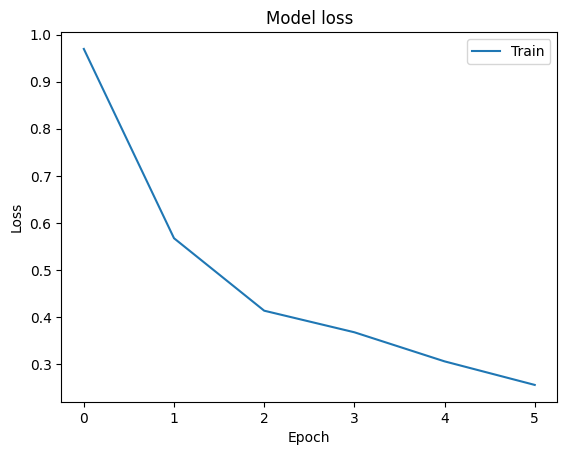

In [170]:
# plot loss from trained model
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

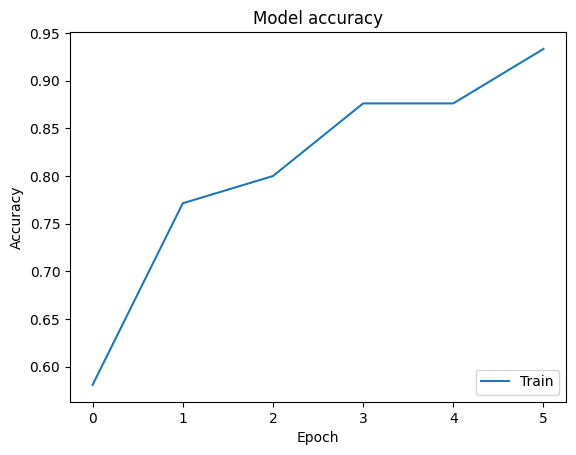

In [171]:
# plot accuracy from trained model
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()